### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

In [2]:
m = np.arange(12).reshape(3,4)
print(f"Our array is {m}")
print(f"The number of rows is {m.shape[0]}")
print(f"The number of columns is {m.shape[1]}")
means = [m[i,].mean() for i in range(m.shape[0])]
print(f"For rows the means are {means}")
means = [m[:,i].mean() for i in range(m.shape[1])]
print(f"For columns the means are {means}")

Our array is [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The number of rows is 3
The number of columns is 4
For rows the means are [1.5, 5.5, 9.5]
For columns the means are [4.0, 5.0, 6.0, 7.0]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
# Using the function outer in numpy
res = np.outer(u, v)
print(f"Using NumPy: {res}")
# Using a nested for loop or list comprehension
res = np.array([[u[i] * v[j] for j in range(len(v))] for i in range(len(u))])
print(f"Using a nested loop: {res}")
# Using numpy broadcasting operations
u = u.reshape(len(u), 1)
res = u * v
print(f"Using broadcasting operations: {res}")

Using NumPy: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using a nested loop: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using broadcasting operations: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result

In [5]:
res = npr.rand(10,6) 
res[res < 0.1] = 0
# code to find indexes of rows
indexes = []
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        if res[i,j] == 0:
            indexes.append((i,j))
indexes = np.array(indexes)
rows_to_exclude = set(indexes[:,0])
res[list(rows_to_exclude), :] = 0
res

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.53155137, 0.53182759, 0.63440096, 0.84943179, 0.72445532,
        0.61102351],
       [0.72244338, 0.32295891, 0.36178866, 0.22826323, 0.29371405,
        0.63097612],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.42635131, 0.89338916, 0.94416002, 0.50183668, 0.62395295,
        0.1156184 ],
       [0.31728548, 0.41482621, 0.86630916, 0.25045537, 0.48303426,
        0.98555979],
       [0.51948512, 0.61289453, 0.12062867, 0.8263408 , 0.60306013,
        0.54506801],
       [0.34276383, 0.30412079, 0.41702221, 0.68130077, 0.87545684,
        0.51042234]])

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [6]:
x = np.linspace(0, 2*np.pi+1./100, 100)
# extract
extract_1 = [x[i] for i in range(len(x)) if i % 10 == 0]
extract_1
# reverse the array
extract_2 = x[::-1]
extract_2
# extract elements
extract_3 = x[np.abs(np.sin(x) - np.cos(x)) < 0.1]
extract_3

array([0.76281034, 0.82637787, 3.87761923, 3.94118676])

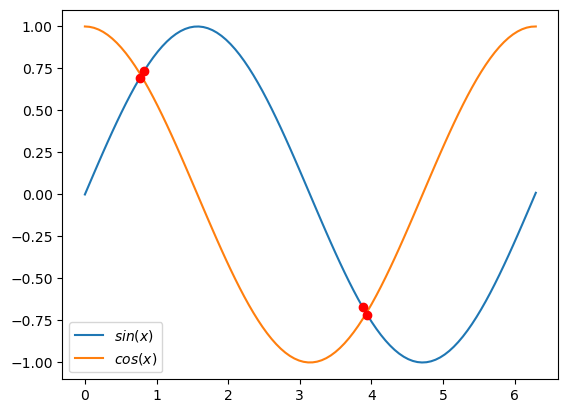

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# make a plot 
plt.plot(x, np.sin(x), label="$sin(x)$")
plt.plot(x, np.cos(x), label="$cos(x)$")
# new_x = [np.where(x==extract_3[i])[0][0] for i in range(len(extract_3))]
# print(new_x)
plt.plot(extract_3, np.sin(extract_3), 'ro')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
big = np.array([i*j for j in range(1, 11) for i in range(1, 11)]).reshape(10,10)
print(f"The trace of the matrix is {big.trace()}")
print(f"The anti-diagonal is {np.diag(big[::-1])}")
print(f"The diagonal extracted with an offset of +1 is {np.diagonal(big, offset=1)}")

The trace of the matrix is 385
The anti-diagonal is [10 18 24 28 30 30 28 24 18 10]
The diagonal extracted with an offset of +1 is [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [9]:
grid = np.array([["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"], [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]], dtype=object)
grid[1] = grid[1]*1.60934 # convertion from miles to km
grid

array([['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa',
        'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque',
        'Flagstaff', 'Los Angeles'],
       [0.0, 318.64932, 487.63002, 1184.47424, 1401.73514, 1890.9745,
        2373.7765, 2484.82096, 3078.6674199999998, 3939.66432]],
      dtype=object)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [10]:
def find_primes(n):
    numbers = np.arange(n)
    mask = np.bool8(np.zeros(n))
    for i in range(2, numbers.size):
        counter = 0
        for j in range(2, i):
            if i % j == 0:
                counter += 1
        if counter == 0:
            mask[i] = True
    return numbers[mask]
n = 100
primes = find_primes(n)
print(primes)
%timeit find_primes(n) # it scales exponentially

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
252 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a row and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.